In [2]:
from dataloader import MyDataset
import model


import torchvision.transforms.functional as tvtF
import torch
from pytorch_fid.fid_score import calculate_activation_statistics, calculate_frechet_distance
from pytorch_fid.inception import InceptionV3


import imageio
import cv2
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

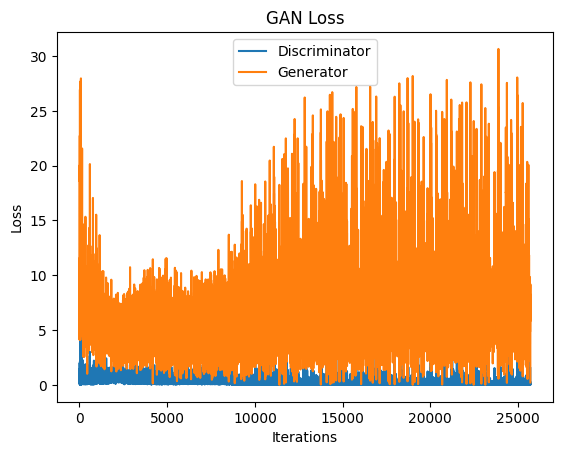

In [8]:
# # Load the data
def load_pkl_data(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

gan_img_data_path = '/home/akshita/Documents/Acads/HW7/gan_final_img_list.pkl'
gan_loss_G_path = '/home/akshita/Documents/Acads/HW7/gan_final_G_loss.pkl'
gan_loss_D_path = '/home/akshita/Documents/Acads/HW7/gan_final_D_loss.pkl'
gan_final_fake_data_path = '/home/akshita/Documents/Acads/HW7/gan_final_fake_data.pkl'

gan_img_data = load_pkl_data(gan_img_data_path)
gan_loss_G = load_pkl_data(gan_loss_G_path)
gan_loss_D = load_pkl_data(gan_loss_D_path)

plt.plot(gan_loss_D, label='Discriminator')
plt.plot(gan_loss_G, label='Generator')
plt.legend()
plt.title('GAN Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./solutions/gan_loss.png')

images = []           
for imgobj in gan_img_data:  
    img = tvtF.to_pil_image(imgobj)  
    images.append(img) 
imageio.mimsave("./solutions/gan_generation_animation.gif", images, fps=5)

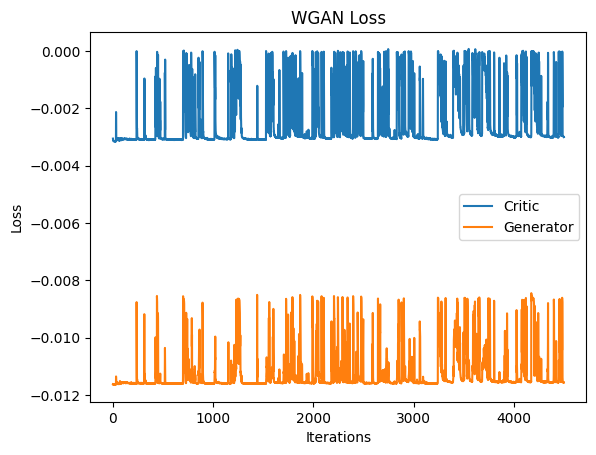

In [9]:
gan_img_data_path = '/home/akshita/Documents/Acads/HW7/wgan_final_img_list.pkl'
gan_loss_G_path = '/home/akshita/Documents/Acads/HW7/wgan_final_G_loss.pkl'
gan_loss_D_path = '/home/akshita/Documents/Acads/HW7/wgan_final_C_loss.pkl'
gan_final_fake_data_path = '/home/akshita/Documents/Acads/HW7/wgan_final_fake_data.pkl'

gan_img_data = load_pkl_data(gan_img_data_path)
gan_loss_G = load_pkl_data(gan_loss_G_path)
gan_loss_D = load_pkl_data(gan_loss_D_path)

plt.plot(gan_loss_D, label='Critic')
plt.plot(gan_loss_G, label='Generator')
plt.legend()
plt.title('WGAN Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.savefig('./solutions/wgan_loss.png')

images = []           
for imgobj in gan_img_data:  
    img = tvtF.to_pil_image(imgobj)  
    images.append(img) 
imageio.mimsave("./solutions/wgan_generation_animation.gif", images, fps=5)

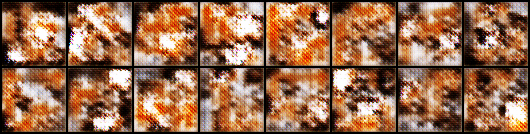

In [10]:
images[]

In [ ]:


# Load the data
fake_path = '/home/akshita/Documents/data/fake_pizzas'
eval_path = '/home/akshita/Documents/data/pizzas'
val_dataset = MyDataset(data_path=eval_path, split='eval')
real_image_files = val_dataset.file_list
fake_image_files = [os.path.join(fake_path, f) for f in os.listdir(fake_path) if f.endswith('.jpg')]
print(len(fake_image_files), len(real_image_files))


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dims = 2048
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]
inception_model = InceptionV3([block_idx]).to(device)

m1, s1 = calculate_activation_statistics(real_image_files, 
                                         inception_model,
                                         device=device)
m2, s2 = calculate_activation_statistics(fake_image_files,
                                            inception_model,
                                            device=device)

fid_value = calculate_frechet_distance(m1, s1, m2, s2)
print(f"FID score: {fid_value}")

# if not os.path.exists(mac_path):
    # os.makedirs(mac_path)
# len(val_dataset)

# Load the model
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)
# generator = model.Generator()
# generator.load_state_dict(torch.load('./solutions/gen_gan.pt', map_location=device))
# generator.eval()
# for i in range(1000):
#     noise = torch.randn(1, 100, 1, 1, device=device)
#     fake = generator(noise)
#     fake = fake.detach().cpu().numpy()
#     # print(fake.shape)
#     fake = np.transpose(fake, (0, 2, 3, 1))
#     # print(fake.shape)
#     fake = ((fake + 1) * 127.5).astype(np.uint8)
#     fake = fake[0]
#     fake = np.expand_dims(fake, axis=0)
#     if i == 0:
#         fake_data = fake
#     else:
        # fake_data = np.concatenate((fake_data, fake), axis=0)

# with open('./solutions/fake_data.pkl', 'wb') as f:
#     pickle.dump(fake_data, f)


# for i, img in enumerate(fake_images):
#     cv2.imwrite(os.path.join(fake_path, f"{i}.jpg"), img)

# for i, img in enumerate(fake_images):
#     plt.figure()
#     plt.imshow(img)
#     plt.axis('off')
#     plt.savefig(os.path.join(fake_path, f"{i}.jpg"), bbox_inches='tight', pad_inches=0)